In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os


In [2]:

df = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')

# Verificações do Data_Set

In [3]:
#Verificando Data_set
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#Verificando tamanho (col,lin) do Data_set
print("Número de Linhas: " + str(df.shape[0]))
print("Número de Colunas: " + str(df.shape[1]))

Número de Linhas: 1000
Número de Colunas: 8


In [5]:
#Verificando quantas valores diferentes tem por coluna
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [6]:
#Verificando quantos nuls tem por coluna
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
#Verificando Colunas 
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [8]:
#Verificando formato das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Exploração de Dados

In [9]:
#Cria função de média das 3 notas
def mean_scores(row):
    mean = (row['math score'] + row['reading score'] + row['writing score']) / 3
    return round(mean,2)

In [10]:
# aplica função de média no data_set
df['mean_score'] = df.apply(mean_scores, axis=1)

Nos grupos raiais/étnicos, é possível verificar que o 'grupo E' tem a maior média de notas, seguido do 'grupo D'


<AxesSubplot:xlabel='race/ethnicity', ylabel='mean_score'>

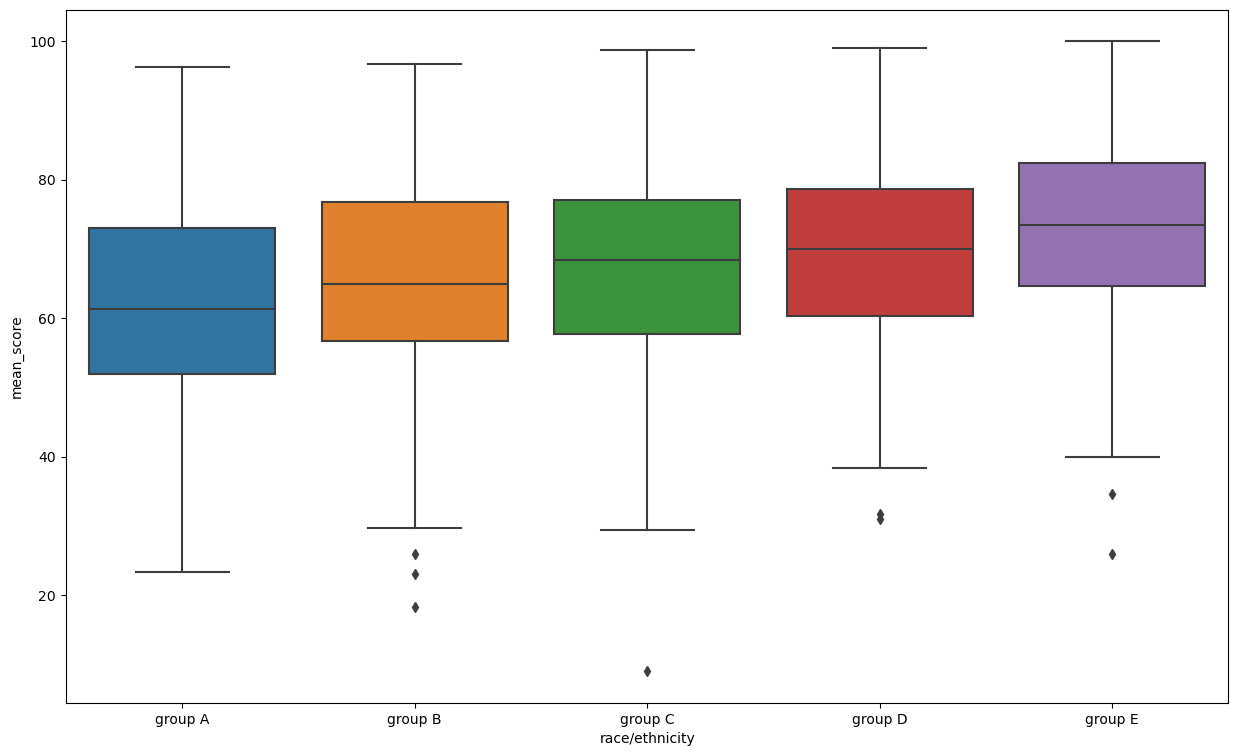

In [11]:
#Cria Gráfico de raça/Etnia por média
plt.figure(figsize=(15,9))

order = sorted(df['race/ethnicity'].unique())

print("Nos grupos raiais/étnicos, é possível verificar que o 'grupo E' tem a maior média de notas, seguido do 'grupo D'")
sns.boxplot(x='race/ethnicity', y='mean_score', data=df, order=order)

'Apenas high school' tem menor média de notas.


<AxesSubplot:xlabel='parental level of education', ylabel='mean_score'>

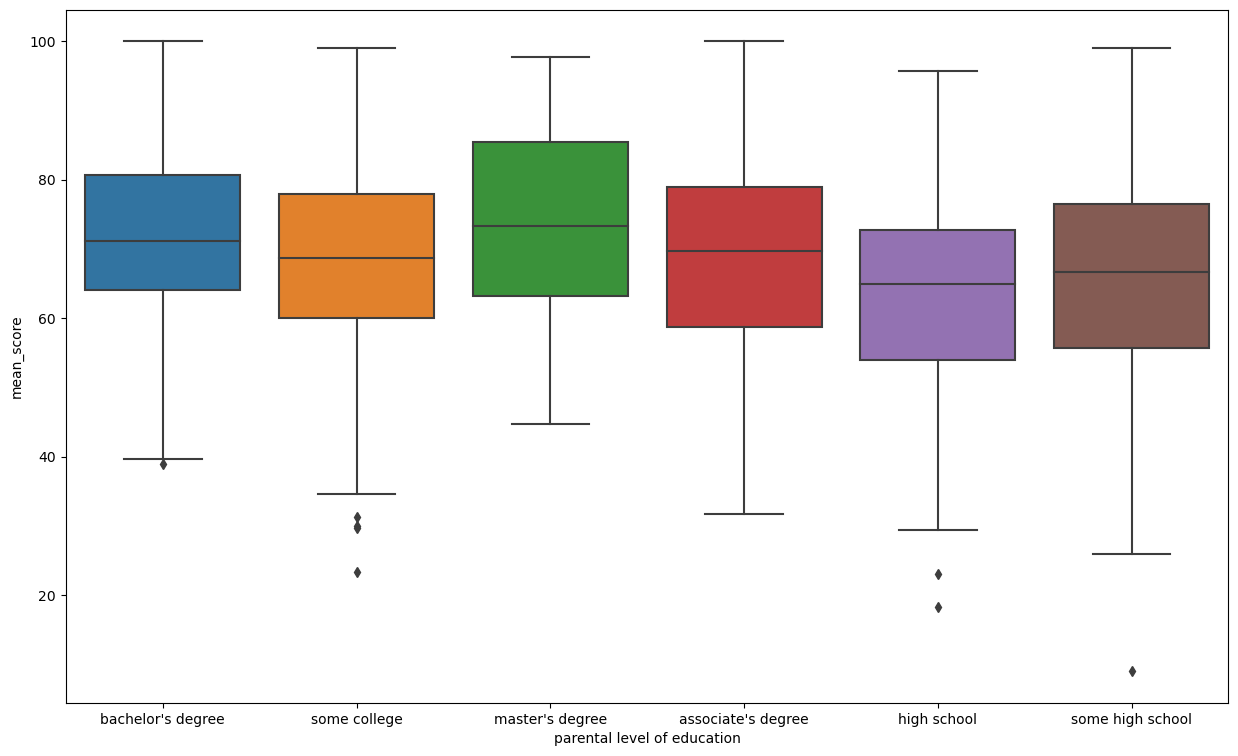

In [12]:
#Cria gráfico de nível de educação parental
plt.figure(figsize=(15,9))

print("'Apenas high school' tem menor média de notas.")
sns.boxplot(x='parental level of education', y='mean_score', data=df)

Lunch 'standard' tem maior média de notas do que lanche 'reduced/free'.



<Figure size 2000x900 with 0 Axes>

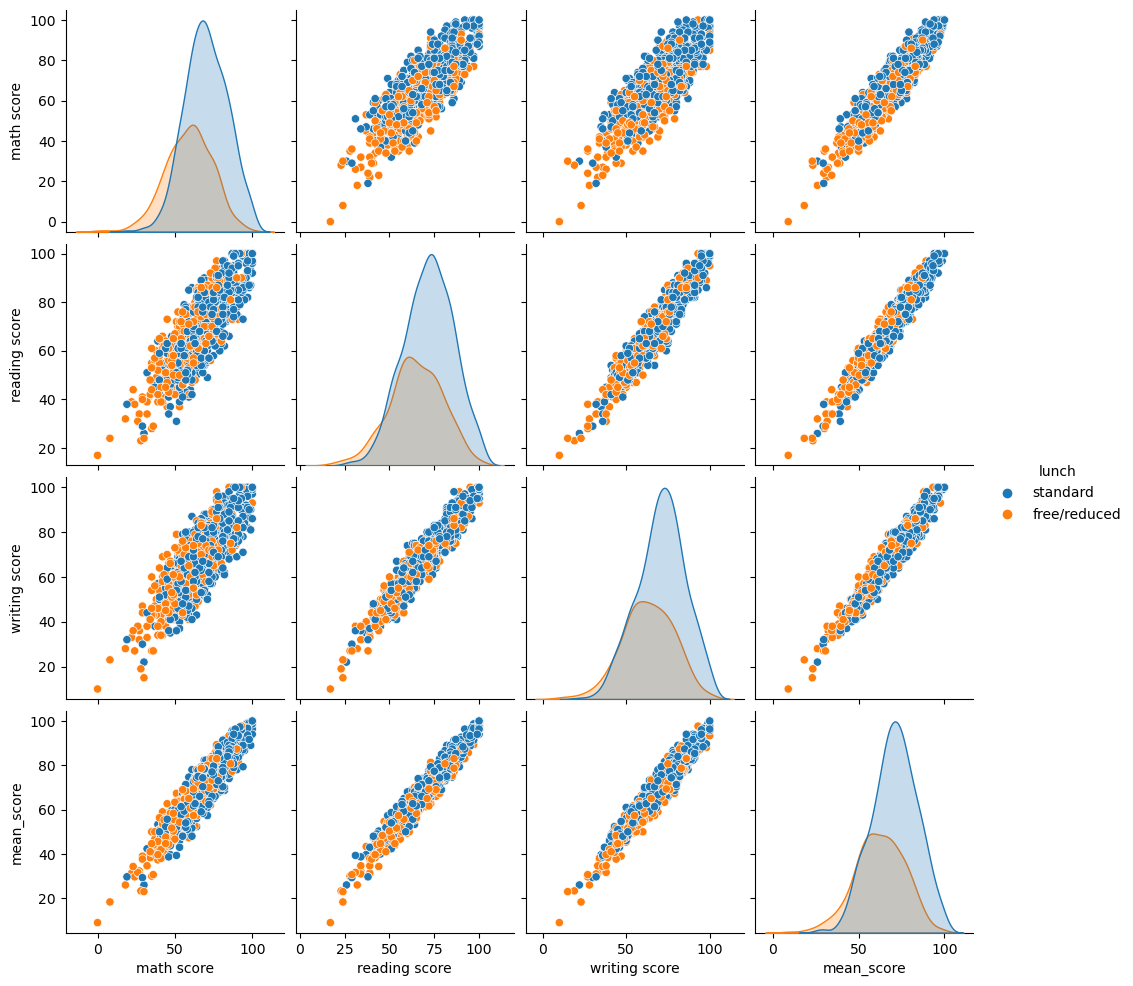

In [13]:
plt.figure(figsize=(20,9))

print("Lunch 'standard' tem maior média de notas do que lanche 'reduced/free'.")
print("")
sns.pairplot(df, hue='lunch')

Aparentemente, a preparação foi mais efetiva para prova de escrita e leitura.

                         math score  reading score  writing score  mean_score
test preparation course                                                      
completed                 69.695531      73.893855      74.418994   72.669469
none                      64.077882      66.534268      64.504673   65.038801



<AxesSubplot:title={'center':'mean_score'}, xlabel='test preparation course', ylabel='mean_score'>

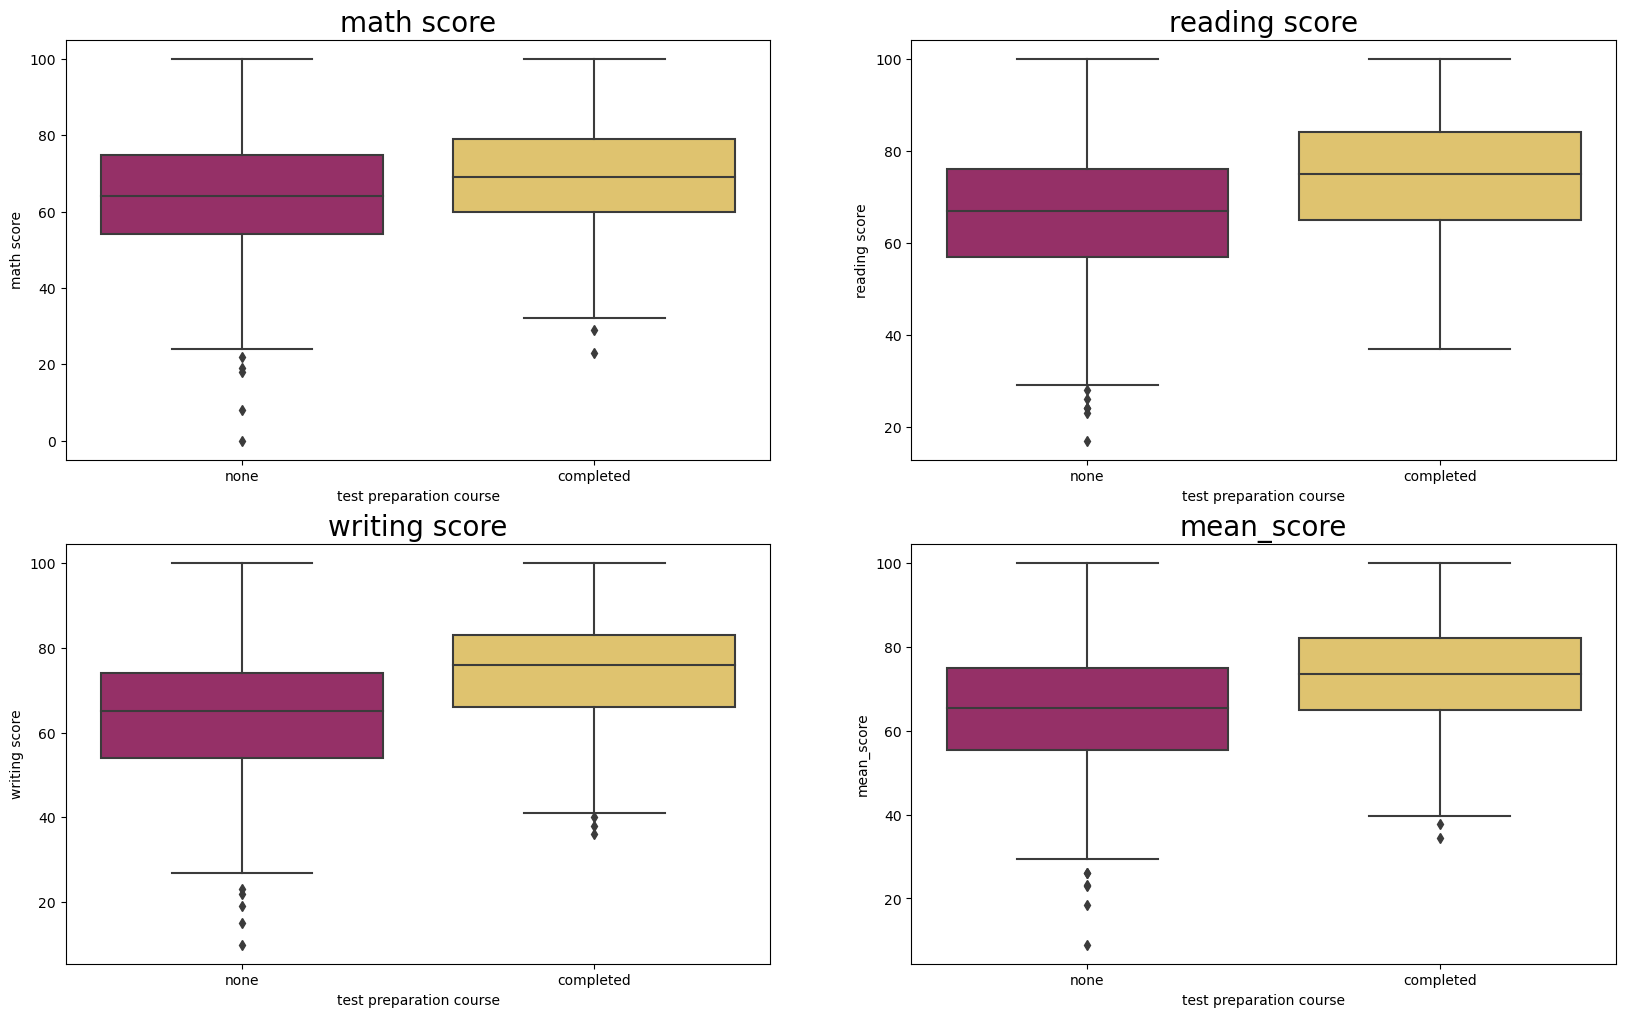

In [14]:
#Cria gráfico comparativo das distribuições de teste/preparação vs as médias nas três matérias
print("Aparentemente, a preparação foi mais efetiva para prova de escrita e leitura.")
print("")
print(df.groupby('test preparation course').mean())
print("")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

colors = ["#A61F69", "#F2CD5C"]
axes[0, 0].set_title('math score', fontsize=20)
sns.boxplot(data=df, x='test preparation course', y='math score', ax=axes[0, 0], palette=colors)
axes[0, 1].set_title('reading score', fontsize=20)
sns.boxplot(data=df, x='test preparation course', y='reading score', ax=axes[0, 1], palette=colors)
axes[1, 0].set_title('writing score', fontsize=20)
sns.boxplot(data=df, x='test preparation course', y="writing score", ax=axes[1, 0], palette=colors)
axes[1, 1].set_title('mean_score', fontsize=20)
sns.boxplot(data=df, x='test preparation course', y='mean_score', ax=axes[1, 1], palette=colors)

A combinação de nota de leitura e escrita tem maior correlação do que combinações com matemática.


<AxesSubplot:>

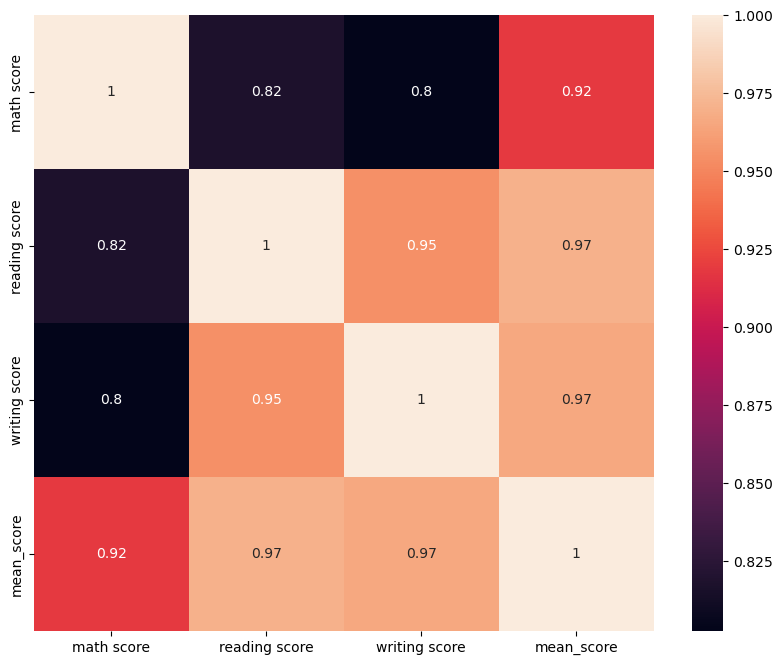

In [15]:
#Verifica correlação de pearson entre as notas.
plt.figure(figsize=(10,8))

print('A combinação de nota de leitura e escrita tem maior correlação do que combinações com matemática.')
sns.heatmap(df.corr(method='pearson'),annot=True, )

# Criação do Modelo 

In [16]:
#criando dummies para o modelo linear
df['lunch_free/reduced'] = np.where(df['lunch']=='free/reduced',1,0)
df['race_group_e'] = np.where(df['race/ethnicity']=='group E',1,0)
df['gender_female'] = np.where(df['gender']=='female',1,0)
df['prep_complet'] = np.where(df['test preparation course']=='completed',1,0)

In [17]:
#Definindo Variáveis. Verificaremos o quanto as váriaveis categóricas e as notas em leitura e escrita influenciam a nota em matemática
y = df['math score']
X = df[['lunch_free/reduced', 'race_group_e',
       'gender_female', 'prep_complet','reading score',
       'writing score']]

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
# Normalizando os dados usando StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [20]:
# Cria o objeto de regressão linear
model = LinearRegression()
# Ajusta o modelo aos dados
model.fit(x_scaled, y)

LinearRegression()

In [21]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


In [22]:
r2 = r2_score(y, model.predict(x_scaled))
y_pred = model.predict(x_scaled)
mae = mean_absolute_error(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100



print('(R²):', r2)
print('Erro absoluto médio:', mae)
print('Erro absoluto médio percentual:', mape)

(R²): 0.8744039428648354
Erro absoluto médio: 4.286702910015758
Erro absoluto médio percentual: inf


In [23]:
coef_angular = model.coef_

pd.DataFrame({'Variáveis Independentes': X.columns,
              'Coeficientes Angulares': coef_angular})

,Variáveis Independentes,Coeficientes Angulares
0,lunch_free/reduced,-1.624284
1,race_group_e,1.648764
2,gender_female,-6.545828
3,prep_complet,-1.581802
4,reading score,4.259771
5,writing score,10.018791


Text(0.5, 1.0, 'Plotagem de regresão Atual vs. Predição')

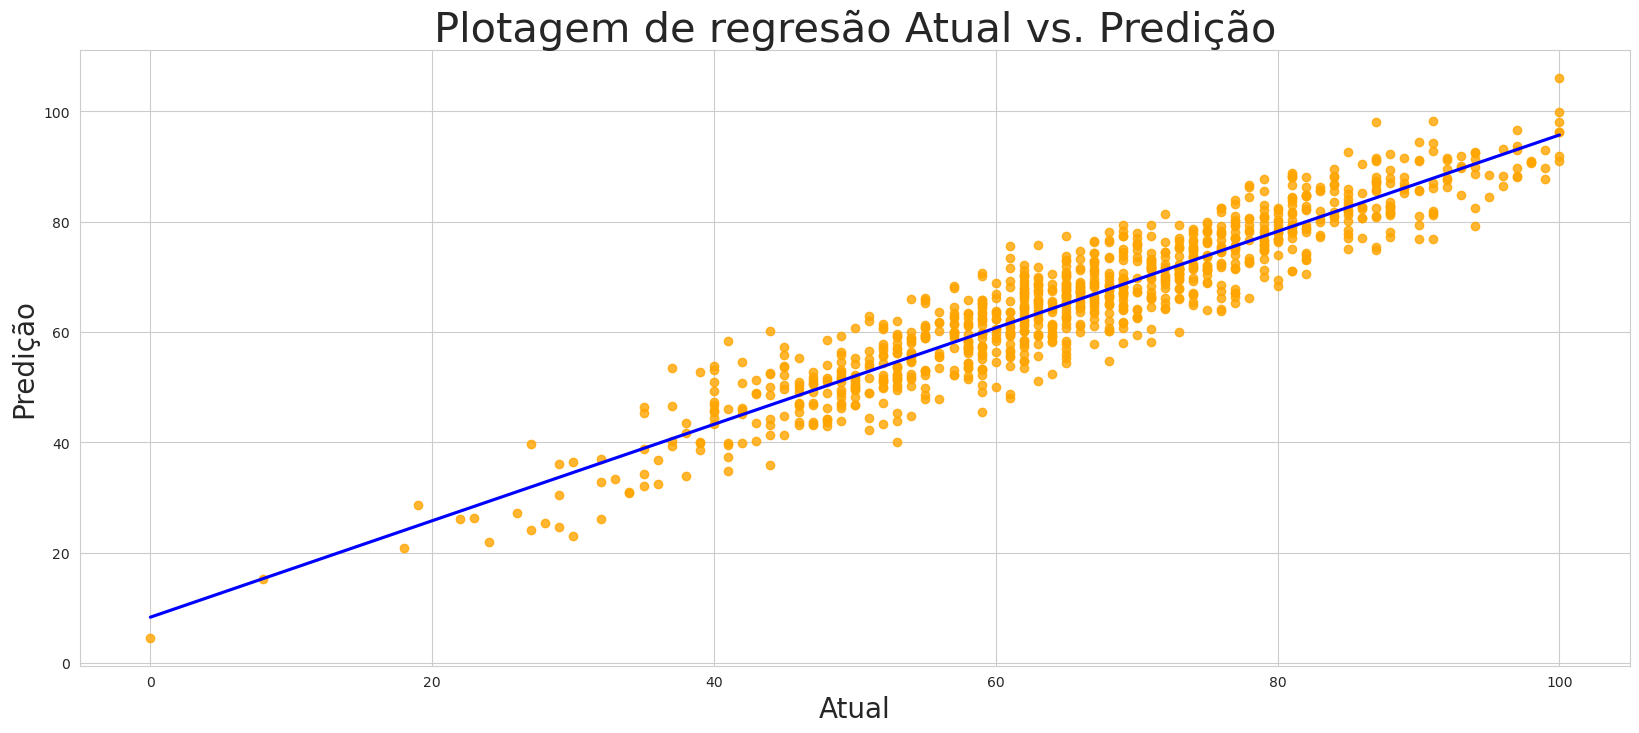

In [24]:
#Cria gráfico de regressão linear do valor real x valor predito
plt.figure(figsize=(20,8))

sns.set_style('whitegrid')
sns.regplot(x=y, y=y_pred, ci=None, color='orange', line_kws={"color": "blue"})

# Set the axis labels and title
plt.xlabel('Atual', fontsize=20)
plt.ylabel('Predição', fontsize=20)
plt.title('Plotagem de regresão Atual vs. Predição', fontsize=30)

* Nos Coeficientes angulares é possível verificar que as dummies de 'lanche reduzido ou grátis', 'Gênero Feminino' e 'Preparação Completa' tem relação negativa com a váriavel dependente 'math score'.

* Já a variável dummies "Grupo E" tem relação positiva.


* Importante: isso é um estudo para portfólio de Data Visualization, Machine Learning e Storytelling. Logo, não há pretensão de provar nada dentro da realidade que nos cerca.